<center><h1> Part I - Sentimental Analysis on Psoriasis Tweets</h1></center>

### Problem Statement : 
<br>
1) What is the general sentiment of people around Psoriasis?
<br>
2) What are the key topics people discuss positively and negatively?
<br>

### 1. Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import os
import re    # for regular expressions 
import nltk  # for text manipulation 
import string 
import warnings
import seaborn as sns 
import matplotlib.pyplot as plt 

In [2]:
from textblob import TextBlob
import sys
import matplotlib.pyplot as plt
import pycountry
nltk.download('stopwords')
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from langdetect import detect
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer

[nltk_data] Downloading package stopwords to C:\Users\Reshma
[nltk_data]     Dua\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer
from nltk.stem.wordnet import WordNetLemmatizer # Load training dataset to Pandas and preview the top rows.
from collections import Counter

### 2. Load extracted tweets csv

In [4]:
df = pd.read_csv('./Psoriasis_3.csv')
df.head()

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1473515342966272005,1473515342966272005,2021-12-22 04:46:49 UTC,2021-12-22,04:46:49,0,1278005743053082625,ariba05723130,ariba,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
1,1473513096501252098,1473513096501252098,2021-12-22 04:37:53 UTC,2021-12-22,04:37:53,0,2450701819,postematico,Postemático,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
2,1473511628440231940,1473511628440231940,2021-12-22 04:32:03 UTC,2021-12-22,04:32:03,0,904378361455235074,snarlincarl,Carl Sonnefeld,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
3,1473508966927904770,1473508966927904770,2021-12-22 04:21:28 UTC,2021-12-22,04:21:28,0,722132324314398720,debesleerlo,Debes Leerlo,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
4,1473506473468645376,1473408121003413505,2021-12-22 04:11:34 UTC,2021-12-22,04:11:34,0,1267683221405347840,soyeahbasically,Soyeahbasically,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'WithBiden1', 'name': 'RidenW...",NaN,NaN,NaN,NaN


In [5]:
df.shape

(2856, 36)

In [6]:
df.columns

Index(['id', 'conversation_id', 'created_at', 'date', 'time', 'timezone',
       'user_id', 'username', 'name', 'place', 'tweet', 'language', 'mentions',
       'urls', 'photos', 'replies_count', 'retweets_count', 'likes_count',
       'hashtags', 'cashtags', 'link', 'retweet', 'quote_url', 'video',
       'thumbnail', 'near', 'geo', 'source', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src',
       'trans_dest'],
      dtype='object')

In [7]:
df = df[df['language'] == 'en']
df = df[['id','tweet','language']]
df.head()

,id,tweet,language
0,1473515342966272005,https://t.co/1C902DTF5Z Natural herbal remedi...,en
2,1473511628440231940,If I’m Shy Glizzy I am suing the hell out of S...,en
5,1473505192696074242,learned i have deep skin fissures because of m...,en
6,1473503830717444097,Psoriasis Home Remedies That Work... https://...,en
7,1473503544619716610,@Random_Outlier @LelenaPeacock Have you been t...,en


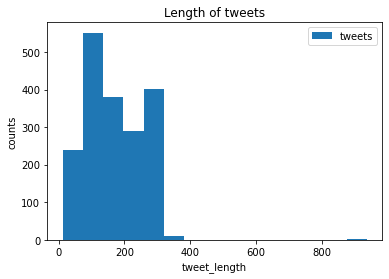

In [8]:
dflen = df['tweet'].str.len()
plt.hist(dflen,label ='tweets',bins=15)
plt.title('Length of tweets')
plt.xlabel('tweet_length')
plt.ylabel('counts')
plt.legend()
plt.show()

#### Insights:
- On an average there are 100+ words in every tweet.
- There are less number of tweets that range over 800 words.

In [9]:
# Get a word count per sentence 
def word_count(sentence):
    return len(sentence.split())
    
df['word_count'] = df['tweet'].apply(word_count)
df.head()

,id,tweet,language,word_count
0,1473515342966272005,https://t.co/1C902DTF5Z Natural herbal remedi...,en,29
2,1473511628440231940,If I’m Shy Glizzy I am suing the hell out of S...,en,15
5,1473505192696074242,learned i have deep skin fissures because of m...,en,11
6,1473503830717444097,Psoriasis Home Remedies That Work... https://...,en,11
7,1473503544619716610,@Random_Outlier @LelenaPeacock Have you been t...,en,28


#### Top 20 words used in the tweets 

In [10]:
all_words = []
for line in list(df['tweet']):
    words = line.split()
    for word in words:
        all_words.append(word.lower())
Counter(all_words).most_common(20)   

[('psoriasis', 1120),
 ('and', 1091),
 ('the', 1084),
 ('to', 954),
 ('of', 853),
 ('a', 786),
 ('i', 747),
 ('for', 642),
 ('my', 570),
 ('in', 526),
 ('with', 524),
 ('is', 478),
 ('have', 391),
 ('you', 379),
 ('#psoriasis', 340),
 ('it', 339),
 ('on', 338),
 ('that', 313),
 ('skin', 293),
 ('your', 226)]

### 3. Data Pre-processing

In [11]:
# Function to clean tweets
def processTweet(tweet):
    # Remove HTML special entities (e.g. &amp;)
    tweet = re.sub(r'\&\w*;', '', tweet)
    #Convert @username to AT_USER
    tweet = re.sub('@[^\s]+','',tweet)
    # Remove stickers
    tweet = re.sub(r'\$\w*', '', tweet)
    # To lowercase
    tweet = tweet.lower()
    # Remove hyperlinks
    tweet = re.sub(r'https?:\/\/.*\/\w*', '', tweet)
    # Remove hashtags
    tweet = re.sub(r'#\w*', '', tweet)
    # Remove Punctuation and split 's, 't, 've with a space for filter
    #tweet = re.sub(r'[' + punctuation.replace('@', '') + ']+', ' ', tweet)
    # Remove words with 2 or fewer letters
    tweet = re.sub(r'\b\w{1,2}\b', '', tweet)
    # Remove whitespace (including new line characters)
    tweet = re.sub(r'\s\s+', ' ', tweet)
    # Remove single space remaining at the front of the tweet.
    tweet = tweet.lstrip(' ') 
    # Remove characters beyond Basic Multilingual Plane (BMP) of Unicode:
    tweet = ''.join(c for c in tweet if c <= '\uFFFF') 
    return tweet

In [12]:
# Clean dataframe's text column
df['p_tweet'] = df['tweet'].apply(processTweet)
# Preview some cleaned tweets
df['p_tweet']

0       natural herbal remedies balance out your body ...
2       ’ shy glizzy suing the hell out skyrizi (the p...
5       learned have deep skin fissures because diabet...
6                   psoriasis home remedies that work... 
7       have you been dermatologist? rheumatoid sent d...
                              ...                        
2844           “she suffered from severe case psoriasis” 
2850    love coffee grounds scrub for psoriasis just b...
2852    most them seem either for humera psoriasis drugs.
2853    you actually watch commercials anymore, you' t...
2855    tonsillectomy and the subsequent risk psoriasi...
Name: p_tweet, Length: 1877, dtype: object

In [13]:
# New dataframe to add sentimental values 
data = df

In [14]:
# Remove @ symbol
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
    return input_txt 

In [15]:
data['tidy_tweet'] = np.vectorize(remove_pattern)(data['p_tweet'], "@[\w]*") 
data['tidy_tweet']

0       natural herbal remedies balance out your body ...
2       ’ shy glizzy suing the hell out skyrizi (the p...
5       learned have deep skin fissures because diabet...
6                   psoriasis home remedies that work... 
7       have you been dermatologist? rheumatoid sent d...
                              ...                        
2844           “she suffered from severe case psoriasis” 
2850    love coffee grounds scrub for psoriasis just b...
2852    most them seem either for humera psoriasis drugs.
2853    you actually watch commercials anymore, you' t...
2855    tonsillectomy and the subsequent risk psoriasi...
Name: tidy_tweet, Length: 1877, dtype: object

In [16]:
# Remove Punctuations,special symbols
data['tidy_tweet'] = data['tidy_tweet'].str.replace("[^a-zA-Z#]", " ") 


<ipython-input-16-61be4c8c8f08>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  data['tidy_tweet'] = data['tidy_tweet'].str.replace("[^a-zA-Z#]", " ")


In [17]:
# Calculating Negative, Positive, Neutral and Compound values
data[['polarity', 'subjectivity']] = data['tidy_tweet'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))

for index, row in data['tidy_tweet'].iteritems() :
    
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    if neg > pos:
        data.loc[index, 'sentiment'] = "negative"
    elif pos > neg:
        data.loc[index, 'sentiment'] = "positive"
    else:
        data.loc[index, 'sentiment'] = "neutral"
    data.loc[index, 'neg'] = neg
    data.loc[index, 'neu'] = neu
    data.loc[index, 'pos'] = pos
    data.loc[index, 'compound'] = comp
data.head()

,id,tweet,language,word_count,p_tweet,tidy_tweet,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,1473515342966272005,https://t.co/1C902DTF5Z Natural herbal remedi...,en,29,natural herbal remedies balance out your body ...,natural herbal remedies balance out your body ...,0.1,0.4,positive,0.000,0.906,0.094,0.3612
2,1473511628440231940,If I’m Shy Glizzy I am suing the hell out of S...,en,15,’ shy glizzy suing the hell out skyrizi (the p...,shy glizzy suing the hell out skyrizi the p...,-0.5,0.5,negative,0.554,0.446,0.000,-0.8271
5,1473505192696074242,learned i have deep skin fissures because of m...,en,11,learned have deep skin fissures because diabet...,learned have deep skin fissures because diabet...,0.0,0.4,neutral,0.000,1.000,0.000,0.0000
6,1473503830717444097,Psoriasis Home Remedies That Work... https://...,en,11,psoriasis home remedies that work...,psoriasis home remedies that work,0.0,0.0,neutral,0.000,1.000,0.000,0.0000
7,1473503544619716610,@Random_Outlier @LelenaPeacock Have you been t...,en,28,have you been dermatologist? rheumatoid sent d...,have you been dermatologist rheumatoid sent d...,0.0,0.0,neutral,0.000,1.000,0.000,0.0000


In [18]:
# Creating new data frames for all sentiments (positive, negative and neutral)
tw_list_negative = data[data["sentiment"]=="negative"]
tw_list_positive = data[data["sentiment"]=="positive"]
tw_list_neutral = data[data["sentiment"]=="neutral"]

In [19]:
# Function for count_values_in single columns
def count_values_in_column(data,feature):
    total=data.loc[:,feature].value_counts(dropna=False)
    percentage = round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])

# Count_values for sentiment
count_values_in_column(data,'sentiment')

,Total,Percentage
positive,902,48.06
negative,568,30.26
neutral,407,21.68


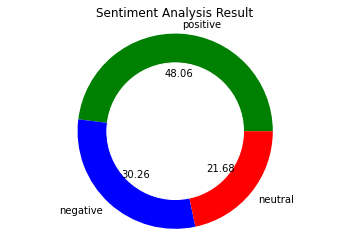

In [20]:
# Create data for Pie Chart
pichart = count_values_in_column(data,'sentiment')
names= pichart.index
size=pichart['Percentage']
 
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(size, labels=names, autopct='%.2f', colors=['green','blue','red'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.style.use('default')   # annotate values

plt.title('Sentiment Analysis Result' )
plt.axis('equal')
plt.show()
plt.show()

#### Insights:
- **48.06%** tweets are positive, because they have more positive sentiments in them in comparision to negative and neutral sentiments. Most of the tweets that are positive, indicate the fact that people are hopeful and confident, and tweet about their ways of dealing with Psoriasis.
<br>

- **30.26%** of the tweets are associated with a negative sentiment. These tweets talk about the trolls and harsh comments people get to read due to their skin condition. Some tweets also focussed on how the comments and treatments undertaken have had an impact in their day-to-day life (feeling anxious and/or depressed).
<br>

- **21.68%** of the tweets comprised of neutral sentiments.
<br>

> Going through each and every tweet to understand the sentiment is tedious and doesn't make a lot of sense, therefore we considered the common words that are used by people in that sentimental category (positive / negative).

### 4. Word Cloud Analysis

In [21]:
stopwords = set(STOPWORDS)

def wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=250,
        max_font_size=30,
        scale=2,
        random_state=5 
).generate(str(data))

    fig = plt.figure(1, figsize=(15, 15))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)
    plt.imshow(wordcloud)
    plt.show()

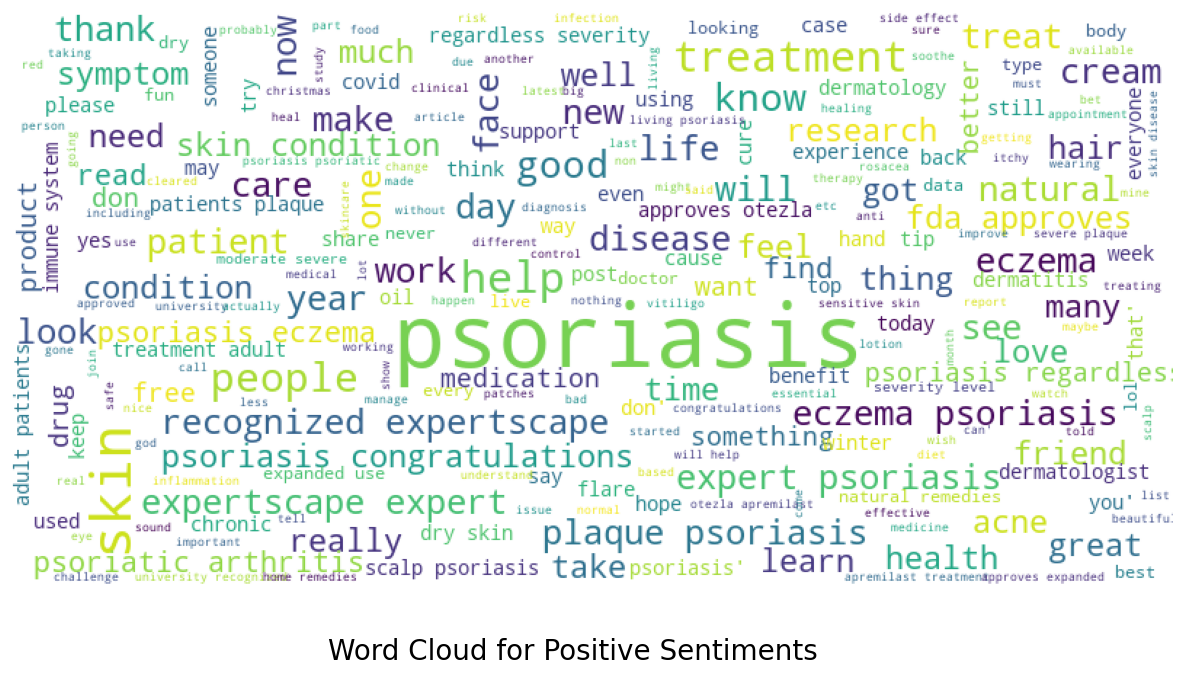

In [22]:
# Creating wordcloud for positive sentiment
wordcloud(tw_list_positive['p_tweet'].values, "Word Cloud for Positive Sentiments")

#### Insights: 
- It's obvious that Psoriasis has the largest word count as it was the keyword that was looked for to retrieve the tweets. This is common for both the sentiments.
<br>

- There are some words that are positive in nature and appear in the cloud.
    - **natual remedies:** the tweets might be talking about the natual remedies that helped the authors.
    <br>
    
    - **expert:** the tweets might refer to an expert or might be suggesting to consult an expert.
    <br>
    
    - **dermatologist:** the prescription by the dermatologist might have helped some authors.
    <br>
    
    - **congratulations:** the tweets might be encoraging and supporting all those going through the condition and not giving up.
    <br>
    
    - **oil, cure, cream:** these words might refer to some product that helped the author to heal.
    <br>
    
There are many more words that made us realise that the model is working well, and is able to classify the tweets properly. Making the analysis and assumptions reliable.

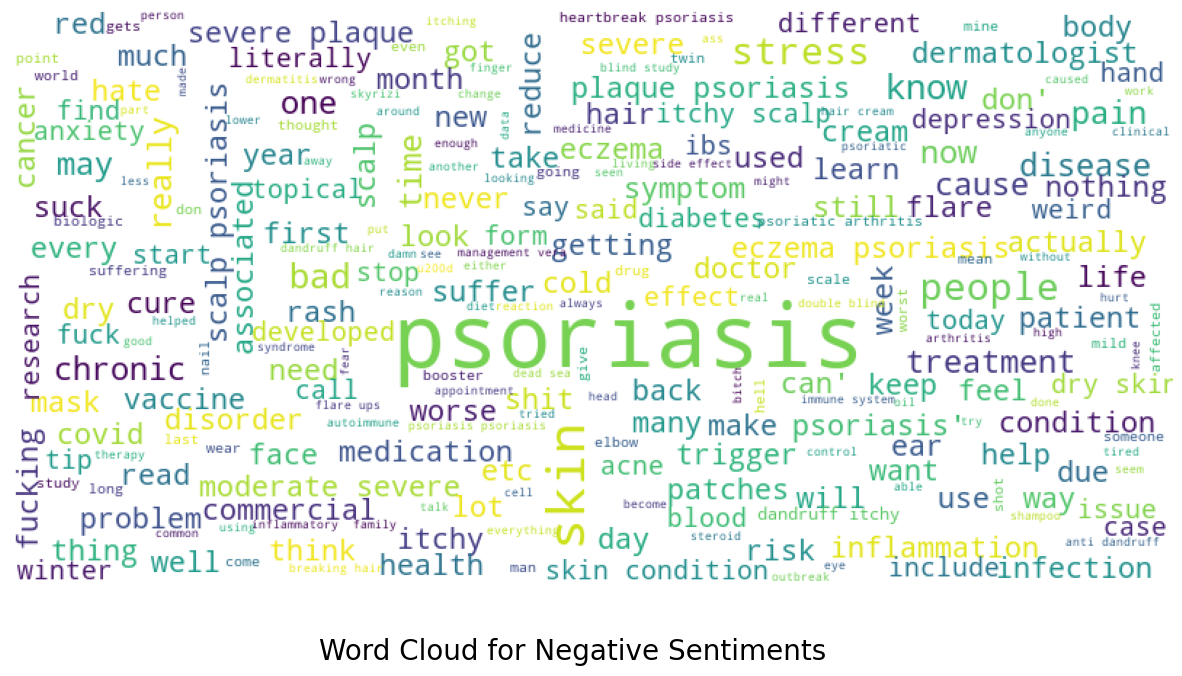

In [23]:
# Creating wordcloud for negative sentiment
wordcloud(tw_list_negative['p_tweet'].values, "Word Cloud for Negative Sentiments")

#### Insights: 
- It's obvious that Psoriasis has the the largest word count as that was the keyword that was looked for to retrieve the tweets.
<br>

- There are some words that are negative in nature and come in the cloud.
    - **anxiety:** the author might be anxious and wrote about it.
    <br>
    
    - **fuck, fucking**: the author might have been frustrated with the treatment not working or some other reason that made them lash out.
    <br>
    
    - **stress:** the stress that the author was under due to the skin condition.
    <br>
    
    - **shit:** lashing out of frustration.
    <br>
    
    - **suck:** lashing out as he/ she is not satisfied.
    <br>
    
    - **bad:** talk about the condition and the word was used as an adjective to describe the same.
    <br>
    
    - **itchy, itching:** the condition does make the skin itchy so that was being shared by the author.
    <br>
    
    - **patches:** the patches that appear on the skin was what these tweets were referring to.
    <br>
    
    - **moderate, severe:** the condition that the author might be in was described by these words.
    <br>
    
    - **dry skin:** the tweet focussed on dry skin conditions .
    <br>
    
    
There are many more words that made us realise that the model is working well, and is able to classify the tweets properly. Making the analysis and assumptions reliable.


In [24]:
# Tokenisation
def remove_punct(text):
    text = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0–9]+', '', text)
    return text
data['punct'] = data['tweet'].apply(lambda x: remove_punct(x))
#Appliyng tokenization
def tokenization(text):
    text = re.split('\W+', text)
    return text
data['tokenized'] = data['punct'].apply(lambda x: tokenization(x.lower()))

In [25]:
# Removing stopwords
stopword = nltk.corpus.stopwords.words('english')

In [26]:
def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text
    
data['nonstop'] = data['tokenized'].apply(lambda x: remove_stopwords(x))
#Appliyng Stemmer
ps = nltk.PorterStemmer()
def stemming(text):
    text = [ps.stem(word) for word in text]
    return text
data['stemmed'] = data['nonstop'].apply(lambda x: stemming(x))

In [27]:
# Cleaning Text
def clean_text(text):
    text_lc = "".join([word.lower() for word in text if word not in string.punctuation]) # remove puntuation
    text_rc = re.sub('[0-9]+', '', text_lc)
    tokens = re.split('\W+', text_rc)    # tokenization
    text = [ps.stem(word) for word in tokens if word not in stopword]  # remove stopwords and stemming
    return text

In [28]:
# Applying Countvectorizer positive 
countVectorizer = CountVectorizer(analyzer=clean_text) 
countVector = countVectorizer.fit_transform(tw_list_positive['tweet'])
print('{} Number of reviews has {} words'.format(countVector.shape[0], countVector.shape[1]))
#print(countVectorizer.get_feature_names())

count_vect_df_positive = pd.DataFrame(countVector.toarray(), columns=countVectorizer.get_feature_names())
count_vect_df_positive.head()

902 Number of reviews has 4508 words


,,aad,aadmemb,aaronrferguson,ab,abeg,abigail,abl,absolut,absorb,...,zak,zero,zerohedg,zerowast,zinc,zombi,zucil,zudaifu,óleo,öffentlich
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
# Most Used Words in positive tweets
count = pd.DataFrame(count_vect_df_positive.sum())
countdf = count.sort_values(0,ascending=False).head(20)
countdf[1:11]

,0
skin,215
like,123
help,121
treatment,117
eczema,111
,105
amp,77
use,73
natur,70
peopl,69


In [30]:
# Applying Countvectorizer negative 
countVectorizer = CountVectorizer(analyzer=clean_text) 
countVector = countVectorizer.fit_transform(tw_list_negative['tweet'])
print('{} Number of reviews has {} words'.format(countVector.shape[0], countVector.shape[1]))
#print(countVectorizer.get_feature_names())

count_vect_df_negative = pd.DataFrame(countVector.toarray(), columns=countVectorizer.get_feature_names())
count_vect_df_negative.head()

568 Number of reviews has 3251 words


,,aadskin,abat,abl,abort,abrupt,absolut,abstract,abt,ac,...,zombi,zone,zwartblesi,ˌsɒrɪˈasɪfɔːm,ˌsɔːrɪˈatɪk,اختلافكقوة,الوعى,انشر,على,وشاركنا
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
# Most Used Words for negative tweets 
count = pd.DataFrame(count_vect_df_negative.sum())
countdf = count.sort_values(0,ascending=False).head(20)
countdf[1:11]

,0
skin,147
,74
get,72
peopl,48
stress,48
scalp,47
sever,47
like,46
eczema,43
hair,41


Here we see the top 10 words that were discussed in the negative sentimental tweets. There is a word that is represented by blank here, which is nothing but a word/string that is not recognised by python, it might be like an emoji that is only present on twitter. It is not to be confused with a blank space as they were removed in the data preprocessing stage.
<br>

> Even though the words gave us a good idea of why the tweet was classified under a particular sentiment, we wanted to understand the reason behind the classification rather than just making general assumptions. Therefore we looked into ngrams. 

## 5. Ngram Analysis

In [32]:
# Function for top 20  ngram 
def get_top_n_gram(corpus,ngram_range,n=None):
    vec = CountVectorizer(ngram_range=ngram_range,stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

#### Positive Tweet Ngram Analysis

In [33]:
# n2_bigram for positive tweets
n2_bigrams = get_top_n_gram(tw_list_positive['tweet'],(2,2),20)
pd.Series(n2_bigrams)

0           (psoriasis https, 100)
1           (plaque psoriasis, 52)
2           (eczema psoriasis, 50)
3         (congratulations dr, 34)
4     (recognized expertscape, 34)
5         (expertscape expert, 34)
6           (expert psoriasis, 34)
7          (retweet psoriasis, 33)
8                   (gt https, 30)
9           (psoriasis eczema, 27)
10              (fda approves, 26)
11            (skincare https, 25)
12        (psoriasis skincare, 24)
13       (psoriatic arthritis, 23)
14      (psoriasis regardless, 22)
15       (regardless severity, 21)
16                  (dry skin, 20)
17           (scalp psoriasis, 19)
18            (like psoriasis, 19)
19           (patients plaque, 19)
dtype: object

#### Insights:
- Most of the tweets had some relevant link that was shared along with the word psoriasis.
<br>

- Eczema causes intense itch and is often confused with Psoriasis and that's the reason why people are referring to Eczema while talking about Psoriasis. Also, Plaque is one of the main type of Psoriasis people are tweeting about. 
<br>

- There were tweets that congratulated some doctors, represented by 'dr' here.
<br>

- There were some positive tweets about expertscape, who might have suggested some medication/ treatment that might have worked.
<br>

- The medications that were approved and tweeted about where FDA approved (some of the medications).
<br>

- There were some tweets on skincare with relevant link, experiences, regimes, etc.
<br>

- Scalp psoriasis, psoriatic arthritis, and something 'like psoriasis' were also tweeted.
<br>

In [34]:
# n3_trigram for positive 
n3_trigrams = get_top_n_gram(tw_list_positive['tweet'],(3,3),20)
pd.Series(n3_trigrams)

0     (recognized expertscape expert, 34)
1      (expertscape expert psoriasis, 34)
2            (expert psoriasis https, 34)
3        (retweet psoriasis skincare, 23)
4     (psoriasis regardless severity, 21)
5          (psoriasis skincare https, 19)
6         (patients plaque psoriasis, 19)
7         (regardless severity level, 17)
8             (adult patients plaque, 17)
9       (plaque psoriasis regardless, 17)
10         (treatment adult patients, 16)
11              (fda approves otezla, 16)
12         (https nxazibsez6 retweet, 16)
13     (nxazibsez6 retweet psoriasis, 16)
14               (expanded use amgen, 13)
15    (psoriasis psoriatic arthritis, 13)
16       (approves otezla apremilast, 12)
17      (otezla apremilast treatment, 12)
18       (apremilast treatment adult, 12)
19       (psoriasis https yzyl594mgx, 11)
dtype: object

#### Insights:
- Some of the tweets make more sense now when we use 3 grams, instead of just 2. recognized expertscape expert, expertscape expert psoriasis are basically talking about the same thing as we discussed earlier.
<br>

- Some promotional content is also captured in the form of tweets, *'expert psoriasis https'*.
<br>

- There are some tweets that talk about some other treatment *'regardless severity level'*.
<br>

- fda approves **otezla**, approves otezla **apremilast**, otezla apremilast treatment and apremilast treatment adult, these tweets talk about the company otezla which has a apremilast treatment that has been approved by FDA and it's mostly for adults. The tweet was broken down into pieces because of the n gram but they are used together in a lot of tweets.
> Original sentence [tokenized]: fda approves otezla apremilast treatment adult. [index:11-18]
<br>

- A lot of tweets also mentioned the name **amgen** and spoke about the expanded use of it.
<br>

> ***We can see that Otezla and Amgen were 2 companies which were positively spoken about in the tweets.*** 

#### Negative Tweet Ngram Analysis

In [35]:
# n2_bigram for negative tweets
n2_bigrams = get_top_n_gram(tw_list_negative['tweet'],(2,2),20)
pd.Series(n2_bigrams)

0         (eczema psoriasis, 29)
1          (psoriasis https, 25)
2         (plaque psoriasis, 21)
3          (scalp psoriasis, 20)
4         (severe psoriasis, 17)
5          (moderate severe, 15)
6            (severe plaque, 13)
7                 (dry skin, 13)
8         (psoriasis eczema, 11)
9              (itchy scalp, 10)
10    (heartbreak psoriasis, 10)
11     (psoriatic arthritis, 10)
12         (suffer psoriasis, 9)
13            (psoriasis dry, 9)
14           (dandruff itchy, 9)
15     (management psoriasis, 9)
16              (study https, 9)
17          (psoriasis flare, 8)
18                (flare ups, 8)
19            (dandruff hair, 8)
dtype: object

#### Insights:

- Eczema causes intense itch and is often confused with Psoriasis and that's the reason why people are referring to Eczema while talking about Psoriasis. Also, Plaque is one of the main type of Psoriasis people are tweeting about. 
<br>

- Many tweets had some relevant link that was shared along with the word psoriasis.
<br>

- Scalp psoriasis, psoriatic arthritis, and something 'like psoriasis' were also tweeted.
<br>

- Few tweets highlight the severity and sufferings of patients in form of itchiness, dryness, dandruff, flare ups.
<br>

In [36]:
# n3_trigram for negative 
n3_trigrams = get_top_n_gram(tw_list_negative['tweet'],(3,3),20)
pd.Series(n3_trigrams)

0      (severe plaque psoriasis, 13)
1          (dandruff itchy scalp, 9)
2        (moderate severe plaque, 9)
3     (management psoriasis aloe, 8)
4           (psoriasis aloe vera, 8)
5            (double blind study, 8)
6             (blind study https, 8)
7        (study https m4ofcnn3lg, 8)
8        (https m4ofcnn3lg https, 8)
9            (anti dandruff hair, 7)
10          (dandruff hair cream, 7)
11             (40 dm 0205773069, 6)
12               (skin refuse 10, 6)
13                (refuse 10 raw, 6)
14                 (10 raw cocoa, 6)
15     (superpower organic goats, 6)
16           (organic goats milk, 6)
17              (goats milk soap, 6)
18          (milk soap available, 6)
19      (soap available twinpack, 6)
dtype: object

#### Insights:

- Some promotional content is also captured in the form of tweets, *'blind study https'*.
<br>

- Some tweets suggest that products like anti dandruff shampoo, aloe vera, raw cocoa and goats milk seem to be ineffective in overcoming itchiness, dryness and flare ups. 
<br>


> Finally, we can analyze sentiments using tweets and realize words that are mosty used along with all words used together.

### References for code
- [NLTK Guide](https://www.analyticsvidhya.com/blog/2021/07/nltk-a-beginners-hands-on-guide-to-natural-language-processing/)

- [WordCloud using Python](https://www.geeksforgeeks.org/generating-word-cloud-python/)

- [Rule-Based Sentiment Analysis in Python](https://www.analyticsvidhya.com/blog/2021/06/rule-based-sentiment-analysis-in-python/)

- [Step process of sentiment analysis in python](https://towardsdatascience.com/step-by-step-twitter-sentiment-analysis-in-python-d6f650ade58d)